In [1]:
import pandas as pd 
import os
os.chdir('/home/spankaew/Git/astrologics')
import astrologics as le
import seaborn as sns
import matplotlib.pyplot as plt

# Load model path into logic_ensemble object

In [2]:
model_path = '/home/spankaew/Git/astrologics/models/herault_hematopoiesis/'
model = le.LogicEnsemble(model_path, project_name = 'herault_hematopoiesis')
model.create_simulation()

Simulation object created


# Calculate attractors from the model cohorts
In this part of the script, we calculate attractors from cohorts of model, and compared using clustermap

# Create simulation trajectory from the simulation
When we perform the simulation, the result of the timestep node activity can be visualized using dimension reduction method such as `pca`.

In [30]:
test = pd.read_csv(model_path + 'bn0.bnet', sep = ',', header = None)
test[1] = 0.5
test_dict = dict(zip(test[0], test[1]))
test_dict

{'Bclaf1': 0.5,
 'CDK46CycD': 0.5,
 'CIPKIP': 0.5,
 'Cebpa': 0.5,
 'Egr1': 0.5,
 'Fli1': 0.5,
 'Gata1': 0.5,
 'Gata2': 0.5,
 'Ikzf1': 0.5,
 'Junb': 0.5,
 'Klf1': 0.5,
 'Myc': 0.5,
 'Spi1': 0.5,
 'Tal1': 0.5,
 'Zfpm1': 0.5}

In [7]:
save_path = '/home/spankaew/Git/astrologics/data/simulation_files/'
model.simulation.simulation_df = pd.read_csv(save_path + 'herault_hematopoiesis_simulation.csv', index_col=0)

In [32]:
model.simulation.update_parameters(max_time = 20,thread_count = 15, sample_count = 2000)
model.simulation.run_simulation(initial_state=test_dict)

Start simulation


100%|██████████| 616/616 [01:51<00:00,  5.51it/s]

Simulation completed


Trajectory object created


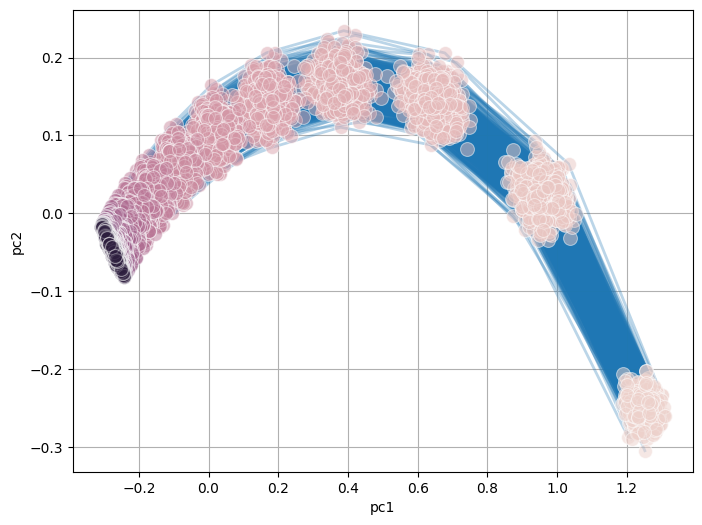

In [33]:
model.create_trajectory()
model.trajectory.pca_trajectory()
model.trajectory.plot_pca_trajectory(color = 'timepoint')

In [34]:
model.trajectory.calculate_distancematrix(mode = 'trajectory')

Calculating distance matrix for whole trajectory...


100%|██████████| 616/616 [00:20<00:00, 30.80it/s]

Distance matrix calculated successfully.


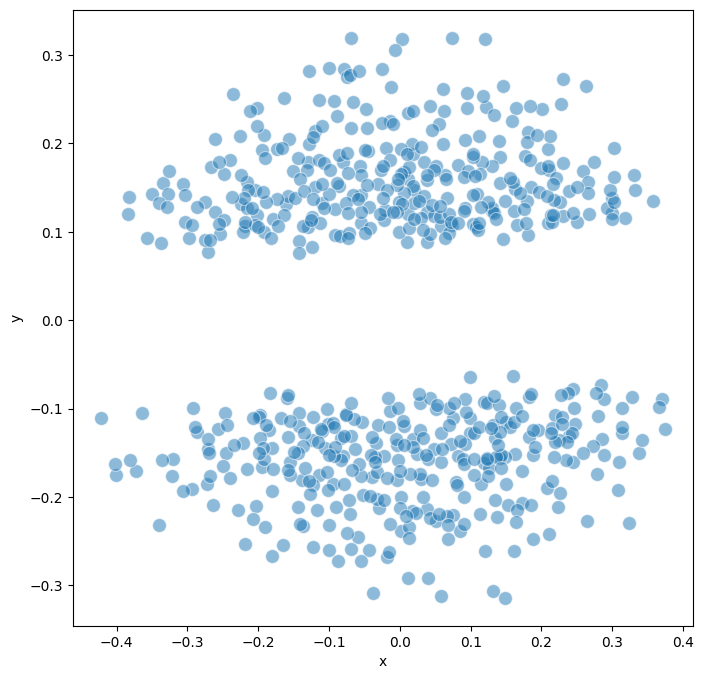

In [36]:
model.trajectory.calculate_MDS()
model.trajectory.plot_MDS(s = 100, fig_size = (8,8))

In [37]:
model.trajectory.calculate_kmean_cluster(n_cluster = 2,
                              random_state = 0)

Calculated k-means clustering with 2 clusters.


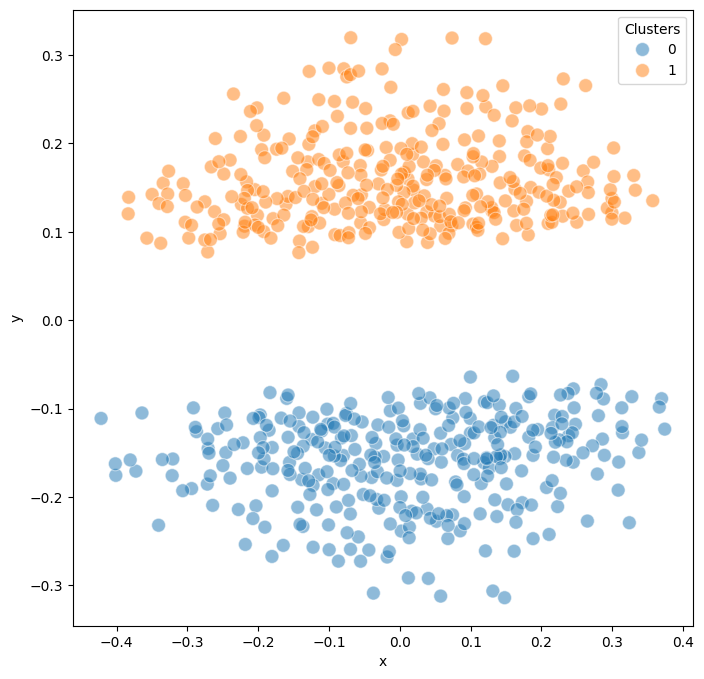

In [38]:
model.trajectory.plot_MDS(s = 100, fig_size = (8,8),plot_cluster = True)

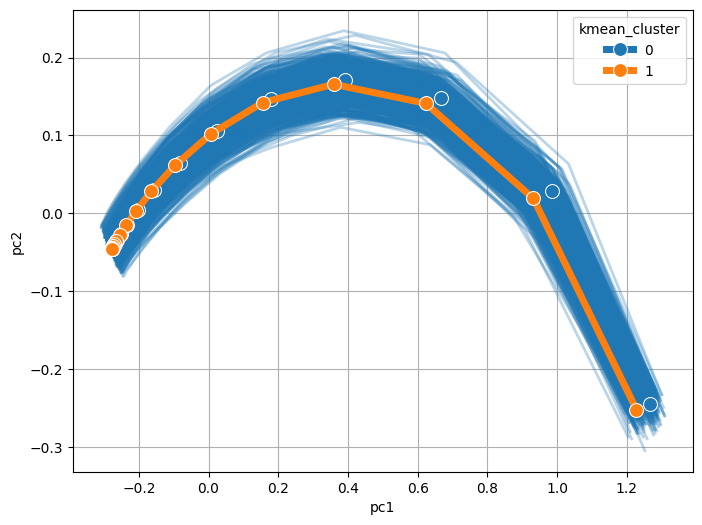

In [39]:
model.trajectory.plot_pca_trajectory(plot_cluster=True)

# Create logic function matrix
In this part of the script, we load models' logic function into a matrix. This matrix can then be transformed into a Disjunctive Normal Form (DNF) which allow us to identify clause of components that can activate each node. 

In [40]:
model.create_logic()
model.logic.model_logic
model.logic.create_flattend_logic_clause()

Loading models logics


100%|██████████| 616/616 [00:00<00:00, 830.12it/s]


Concatenate results into matrix


100%|██████████| 616/616 [00:00<00:00, 1792.28it/s]

Logic object created
Flatten models logic clauses



100%|██████████| 616/616 [00:00<00:00, 2861230.64it/s]


Concatenate results into matrix


100%|██████████| 616/616 [00:00<00:00, 1542.59it/s]


Flattend logic clause created


In [41]:
# Remove any key named 'herault_hematopoiesis' from the cluster_dict if it exists
cluster_dict = model.trajectory.cluster_dict.copy()
cluster_dict.pop('herault_hematopoiesis', None)
cluster_dict

{'bn168': np.int32(1),
 'bn602': np.int32(1),
 'bn157': np.int32(1),
 'bn45': np.int32(0),
 'bn8': np.int32(0),
 'bn109': np.int32(1),
 'bn307': np.int32(1),
 'bn12': np.int32(0),
 'bn530': np.int32(1),
 'bn321': np.int32(0),
 'bn547': np.int32(1),
 'bn487': np.int32(1),
 'bn408': np.int32(1),
 'bn404': np.int32(0),
 'bn566': np.int32(0),
 'bn494': np.int32(1),
 'bn580': np.int32(1),
 'bn65': np.int32(1),
 'bn122': np.int32(0),
 'bn421': np.int32(1),
 'bn170': np.int32(0),
 'bn42': np.int32(1),
 'bn351': np.int32(0),
 'bn553': np.int32(0),
 'bn186': np.int32(0),
 'bn326': np.int32(0),
 'bn238': np.int32(0),
 'bn131': np.int32(0),
 'bn212': np.int32(1),
 'bn499': np.int32(1),
 'bn369': np.int32(1),
 'bn383': np.int32(1),
 'bn250': np.int32(1),
 'bn572': np.int32(0),
 'bn341': np.int32(1),
 'bn60': np.int32(0),
 'bn215': np.int32(1),
 'bn391': np.int32(0),
 'bn206': np.int32(1),
 'bn116': np.int32(1),
 'bn224': np.int32(1),
 'bn465': np.int32(0),
 'bn100': np.int32(0),
 'bn271': np.int32

Model clusters mapped to logic clauses


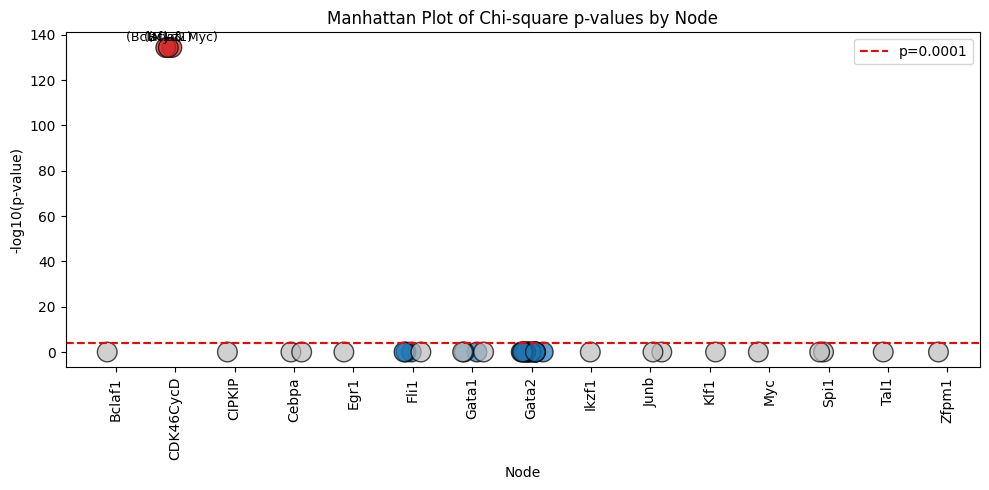

In [42]:
model.logic.map_model_clusters(cluster_dict)
model.logic.calculate_logic_statistic(pval_threshold = 0.0001)
model.logic.plot_manhattan()

/home/spankaew/Git/astrologics/astrologics/logical_rules_processing.py:412: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/home/spankaew/Git/astrologics/astrologics/logical_rules_processing.py:412: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


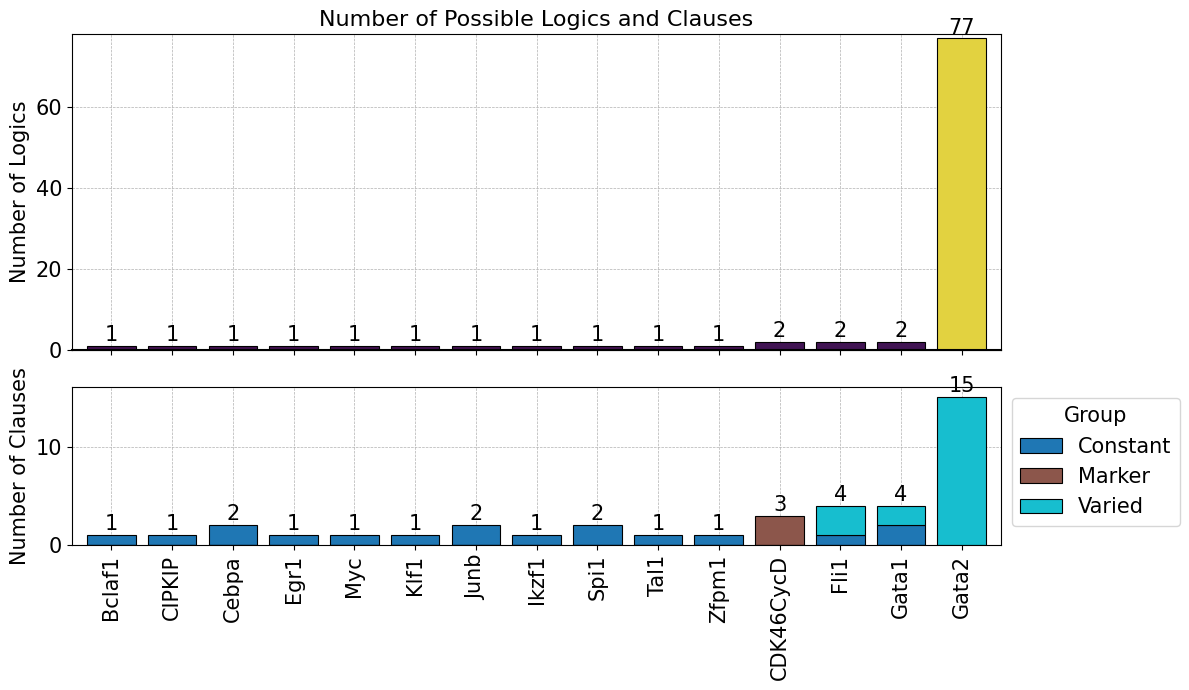

In [43]:
model.logic.plot_logicstat_summary()

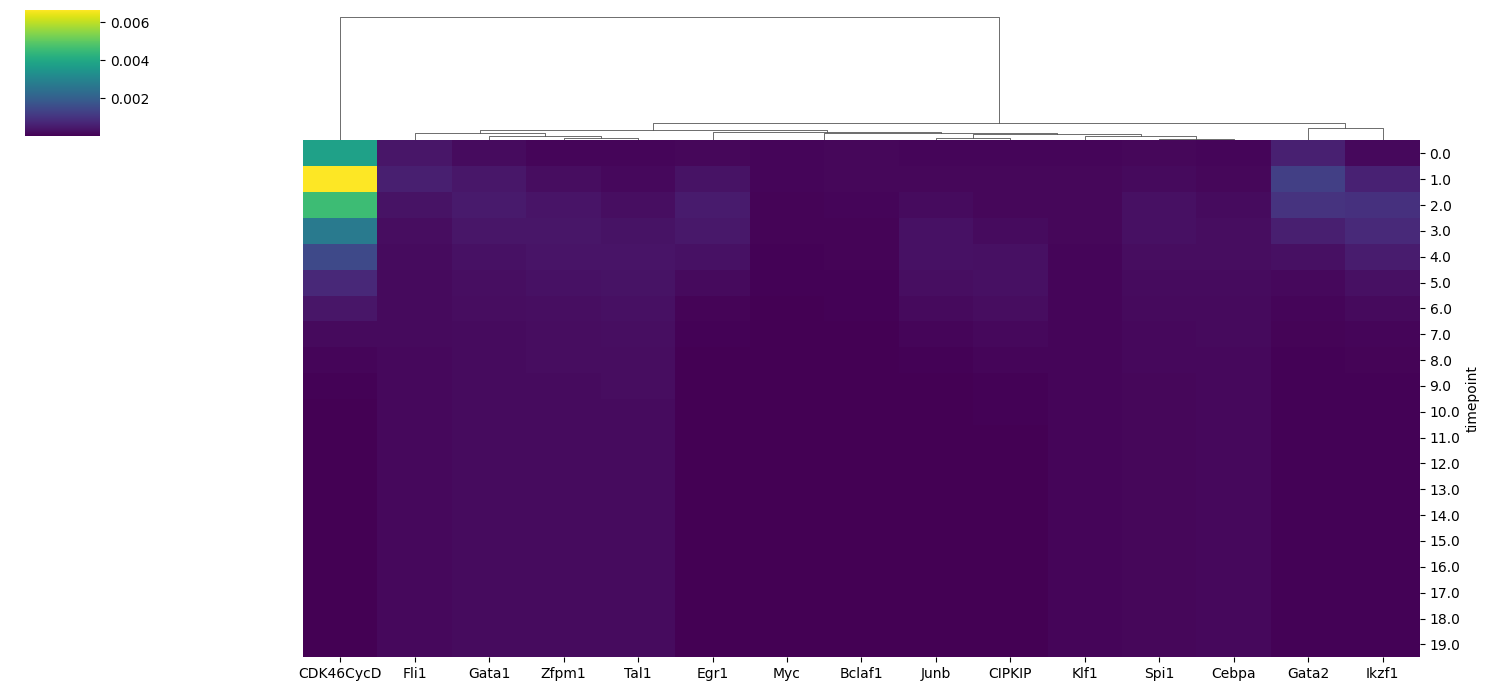

In [44]:
model.trajectory.plot_trajectory_variance()

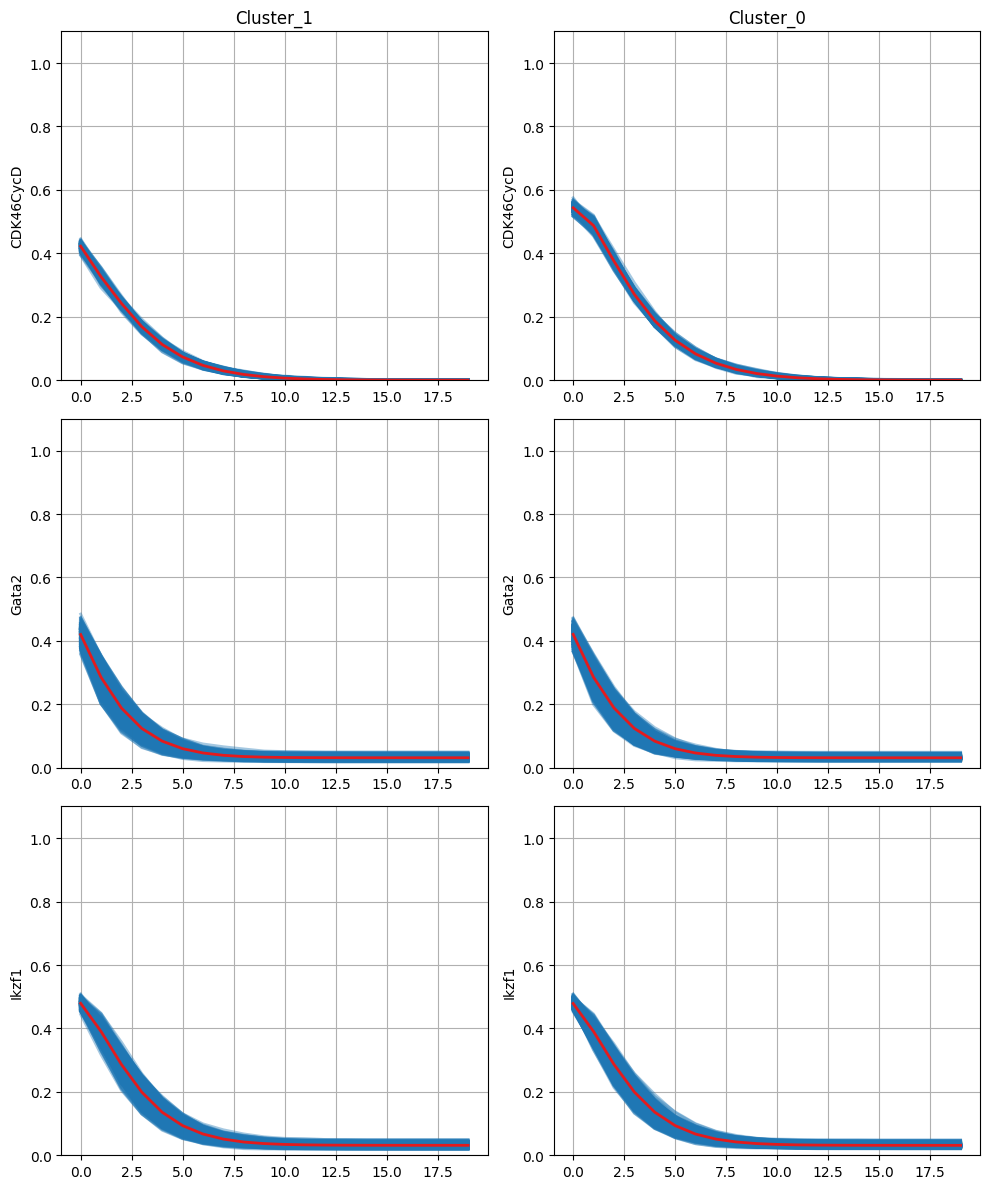

In [45]:
model.trajectory.plot_node_trajectory(node = ['CDK46CycD', 'Gata2','Ikzf1'],
                                      fig_size = (8, 8))

<Figure size 800x800 with 0 Axes>

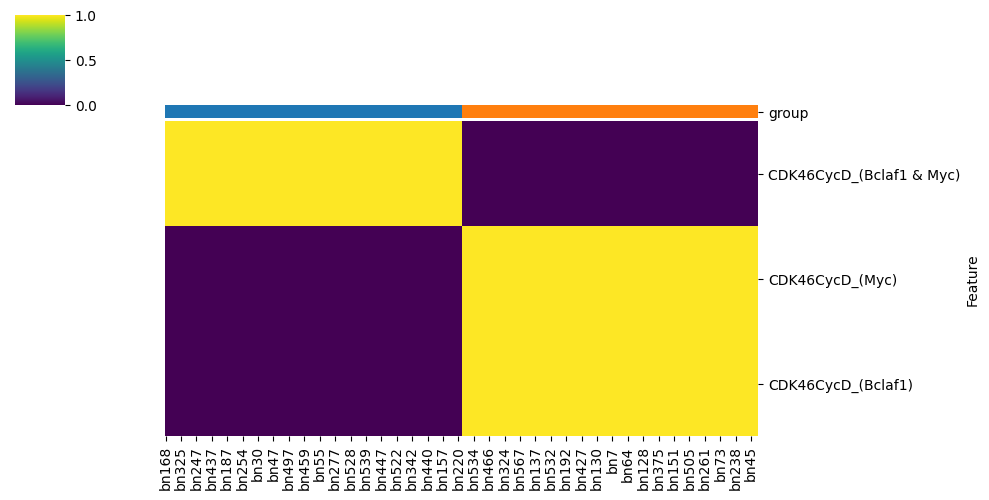

In [47]:
model.logic.plot_node_logic_heatmap(node = ['CDK46CycD'],
                                     fig_size = (8, 8))